# Time Series Decomposotion Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df['year'] = df['Month'].dt.year 
df['month'] = df['Month'].dt.month
df['days'] = df['Month'].dt.days_in_month
df['passengers_per_day'] = df['#Passengers']/df['days']
df.head()

,Month,#Passengers,year,month,days,passengers_per_day
0,1949-01-01,112,1949,1,31,3.612903
1,1949-02-01,118,1949,2,28,4.214286
2,1949-03-01,132,1949,3,31,4.258065
3,1949-04-01,129,1949,4,30,4.300000
4,1949-05-01,121,1949,5,31,3.903226


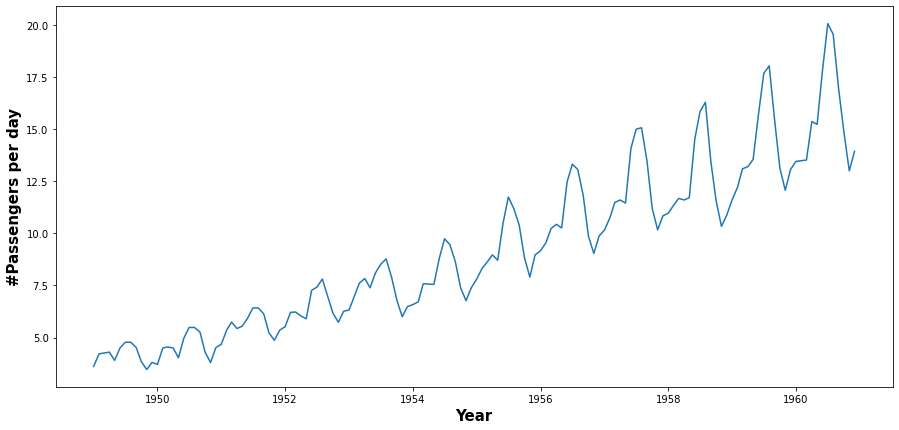

In [3]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df.Month, df.passengers_per_day)

ax.set_xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
ax.set_ylabel('#Passengers per day', fontsize=15, fontdict={'weight':'bold'})

plt.show()

# Klasik Ayrıştırma

## Toplamsal Ayrıştırma

- Serideki gözlemlerin sıklığına göre m Hareketli Ortalama hesaplanır. m değeri gözlemler aylık ise 12, çeyreklik ise 4, günlük ise 7 olarak alınabilir.

In [4]:
ma12 = np.empty(df['passengers_per_day'].values.shape)
ma12[:] = np.NaN

ma12[5:-6] = df['passengers_per_day'].rolling(12).mean().iloc[11:].values

ma12x2 = np.empty(df['passengers_per_day'].values.shape)
ma12x2[:] = np.NaN
ma12x2[2:] = pd.DataFrame(ma12).rolling(2).mean().iloc[2:].values.reshape(142,)

df['MA12'] = ma12x2
df.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA12
0,1949-01-01,112,1949,1,31,3.612903,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN
2,1949-03-01,132,1949,3,31,4.258065,NaN
3,1949-04-01,129,1949,4,30,4.300000,NaN
4,1949-05-01,121,1949,5,31,3.903226,NaN
5,1949-06-01,135,1949,6,30,4.500000,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.169201
7,1949-08-01,148,1949,8,31,4.774194,4.185138
8,1949-09-01,136,1949,9,30,4.533333,4.209140
9,1949-10-01,119,1949,10,31,3.838710,4.229570


- Seriden, Hareketli Ortalama ile hesaplanan yeni seriyi çıkararak **trendi ayrıştırılmış(detrended)** seri elde edilir.

In [5]:
df["detrended"] = df.passengers_per_day - df.MA12
df.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA12,detrended
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN
2,1949-03-01,132,1949,3,31,4.258065,NaN,NaN
3,1949-04-01,129,1949,4,30,4.300000,NaN,NaN
4,1949-05-01,121,1949,5,31,3.903226,NaN,NaN
5,1949-06-01,135,1949,6,30,4.500000,NaN,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.169201,0.604992
7,1949-08-01,148,1949,8,31,4.774194,4.185138,0.589055
8,1949-09-01,136,1949,9,30,4.533333,4.209140,0.324194
9,1949-10-01,119,1949,10,31,3.838710,4.229570,-0.390860


- Her mevsim için mevsimsel bileşeni tahmin etmek için, o mevsim için trendden arındırılmış serinin(detrend) ortalamasını almanız yeterlidir. Örneğin, Şubat ayına ilişkin mevsimsel bileşen, gözlemlerdeki tüm trendi ayrıştırılmış Şubat ayı değerlerinin ortalamasıdır.

In [6]:
seasonal_mean = df.groupby(by="month").mean()[["detrended"]]
seasonal_mean

,detrended
month,
1,-0.984847
2,-0.599825
3,-0.260311
4,-0.148092
5,-0.336060
6,1.302560
7,1.882021
8,1.847769
9,0.657455


posx and posy should be finite values
posx and posy should be finite values


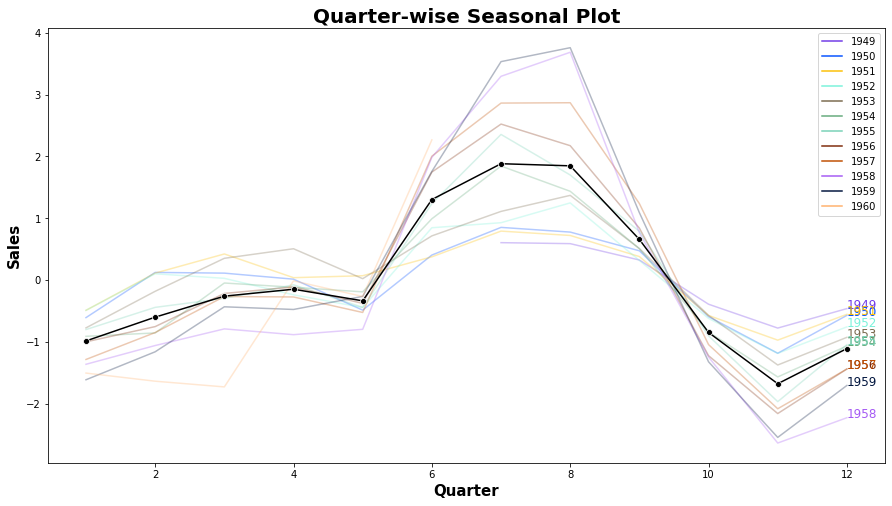

In [7]:
years = df.year.unique()
#line colors
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x="month", y="detrended", hue="year", data=df, palette=list(mycolors), alpha=0.3)
sns.lineplot(x=seasonal_mean.index, y="detrended",data=seasonal_mean, color="black",marker="o",alpha=1)

#line texts
for i, y in enumerate(years):
        ax.text(df.loc[df.year==y].shape[0], df.loc[df.year==y, 'detrended'][-1:].values[0], 
                                                             y, fontsize=12, color=mycolors[i])
        
ax.set_title("Quarter-wise Seasonal Plot", fontsize=20, fontdict={'weight':'bold'})
ax.set_xlabel('Quarter', fontsize = 15, fontdict={'weight':'bold'})
ax.set_ylabel('Sales', fontsize = 15, fontdict={'weight':'bold'})

plt.show()

In [8]:
df["seasonal_mean"] = df["month"].apply(lambda x:seasonal_mean.loc[[x]]["detrended"].values[0])
df.head(13)

,Month,#Passengers,year,month,days,passengers_per_day,MA12,detrended,seasonal_mean
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN,-0.984847
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN,-0.599825
2,1949-03-01,132,1949,3,31,4.258065,NaN,NaN,-0.260311
3,1949-04-01,129,1949,4,30,4.300000,NaN,NaN,-0.148092
4,1949-05-01,121,1949,5,31,3.903226,NaN,NaN,-0.336060
5,1949-06-01,135,1949,6,30,4.500000,NaN,NaN,1.302560
6,1949-07-01,148,1949,7,31,4.774194,4.169201,0.604992,1.882021
7,1949-08-01,148,1949,8,31,4.774194,4.185138,0.589055,1.847769
8,1949-09-01,136,1949,9,30,4.533333,4.209140,0.324194,0.657455
9,1949-10-01,119,1949,10,31,3.838710,4.229570,-0.390860,-0.847782


In [9]:
df["remainder"] = df.detrended - df.seasonal_mean
df.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA12,detrended,seasonal_mean,remainder
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN,-0.984847,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN,-0.599825,NaN
2,1949-03-01,132,1949,3,31,4.258065,NaN,NaN,-0.260311,NaN
3,1949-04-01,129,1949,4,30,4.300000,NaN,NaN,-0.148092,NaN
4,1949-05-01,121,1949,5,31,3.903226,NaN,NaN,-0.336060,NaN
5,1949-06-01,135,1949,6,30,4.500000,NaN,NaN,1.302560,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.169201,0.604992,1.882021,-1.277029
7,1949-08-01,148,1949,8,31,4.774194,4.185138,0.589055,1.847769,-1.258713
8,1949-09-01,136,1949,9,30,4.533333,4.209140,0.324194,0.657455,-0.333262
9,1949-10-01,119,1949,10,31,3.838710,4.229570,-0.390860,-0.847782,0.456922


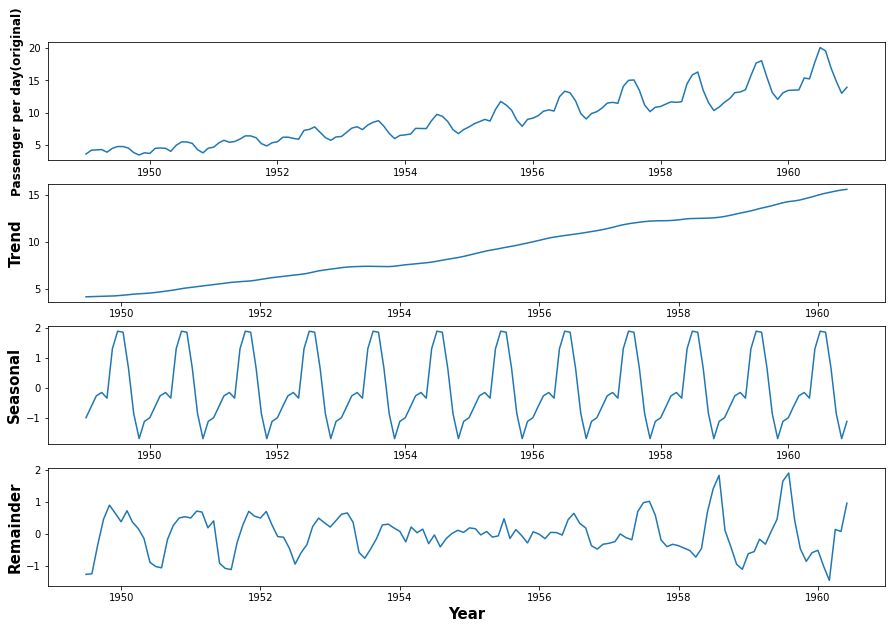

In [10]:
fig, ax = plt.subplots(4,1,figsize=(15, 10))

ax[0].plot(df.Month, df.passengers_per_day)

ax[0].set_ylabel('Passenger per day(original)', fontsize=12, fontdict={'weight':'bold'})

ax[1].plot(df.Month, df.passengers_per_day-df.detrended)

ax[1].set_ylabel('Trend', fontsize=15, fontdict={'weight':'bold'})

ax[2].plot(df.Month, df.seasonal_mean)

ax[2].set_ylabel('Seasonal', fontsize=15, fontdict={'weight':'bold'})

ax[3].plot(df.Month, df.remainder)

ax[3].set_xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
ax[3].set_ylabel('Remainder', fontsize=15, fontdict={'weight':'bold'})

plt.show()

- Y eksenindeki değerlere dikkat edin. Mevsimsel iniş çıkışlar göründüğü kadar yüksek değil aslında.

Daha tutarlı bir grafik için y ekseni ölçeğini bütün grafikler için yapalım.

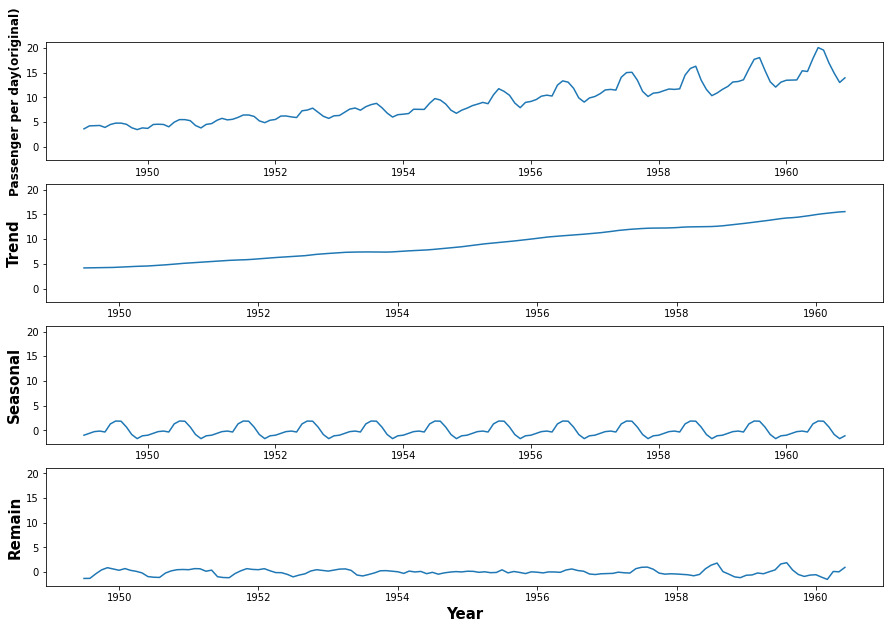

In [11]:
fig, ax = plt.subplots(4,1,figsize=(15, 10), sharey=True)

ax[0].plot(df.Month, df.passengers_per_day)

ax[0].set_ylabel('Passenger per day(original)', fontsize=12, fontdict={'weight':'bold'})

ax[1].plot(df.Month, df.passengers_per_day-df.detrended)

ax[1].set_ylabel('Trend', fontsize=15, fontdict={'weight':'bold'})

ax[2].plot(df.Month, df.seasonal_mean)

ax[2].set_ylabel('Seasonal', fontsize=15, fontdict={'weight':'bold'})

ax[3].plot(df.Month, df.remainder)

ax[3].set_xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
ax[3].set_ylabel('Remain', fontsize=15, fontdict={'weight':'bold'})

plt.show()